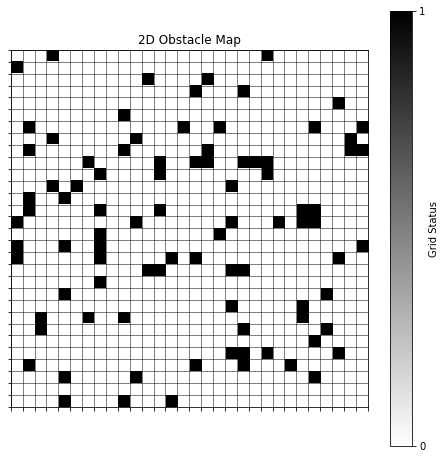

Grid map: [[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

# This class contains the obstacle map of the environement and a representation in NP Array, with some functionality to visualise

class ObstacleMap:
    def __init__(self, grid_size, obstacle_positions=None):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size), dtype=int)
        self.obstacle_positions = obstacle_positions
        self.setup()
 
    def setup(self):
        self._set_obstacle(0.1)
 
    def _set_obstacle(self, percentage_of_obstacle):
        if self.obstacle_positions is None:
            # Fill 10% of the grid with random obstacles
            num_obstacles = int(percentage_of_obstacle * self.grid_size * self.grid_size)
            self.obstacle_positions = self._generate_random_obstacles(num_obstacles)
        for pos in self.obstacle_positions:
            if self.is_valid_position(pos):
                self.grid[pos] = 1  # Mark obstacles with 1
            else:
                print(f"Warning: Obstacle position {pos} is out of bounds and will be ignored.")
 
 
    def _generate_random_obstacles(self, num_obstacles):
        """Generate random obstacle positions."""
        all_positions = [(x, y) for x in range(self.grid_size) for y in range(self.grid_size)]
        selected_indices = np.random.choice(len(all_positions), num_obstacles, replace=False)
        return [all_positions[i] for i in selected_indices]
    def is_valid_position(self, pos):
        return 0 <= pos[0] < self.grid_size and 0 <= pos[1] < self.grid_size
 
    def display_map(self):
        """Displays the current obstacle map."""
        plt.figure(figsize=(8, 8))
        plt.imshow(self.grid, cmap='binary', origin='upper')
        plt.title("2D Obstacle Map")
        plt.colorbar(ticks=[0, 1], label='Grid Status')
        plt.xticks(np.arange(-0.5, self.grid_size, 1), [])
        plt.yticks(np.arange(-0.5, self.grid_size, 1), [])
        plt.grid(color='black', linestyle='-', linewidth=0.5)
        plt.show()
 
    def check_obstacle(self, x, y):
        """Check if a given position (x, y) is an obstacle."""
        if 0 <= x < self.grid_size and 0 <= y < self.grid_size:
            return self.grid[y, x] == 1
        else:
            raise ValueError("Position out of bounds")
 
    def get_map(self):
        return self.grid
    def save_obstacle_map(self, file_path):
        np.savetxt(file_path, self.grid, fmt='%d', delimiter=',')
        print(f"Obstacle map saved to {file_path}")
 
    def save_grayscale_image(self, filename):
        plt.imshow(self.grid, cmap='gray')
        plt.axis('off')  # Turn off axis
        plt.savefig(filename, bbox_inches='tight', pad_inches=0, dpi=300)
        plt.close()  # Close the figure to free up memory
 
 
    def load_obstacle_map(self, file_path):
        loaded_map = np.loadtxt(file_path, dtype=int, delimiter=',')
        print(f"Obstacle map loaded from {file_path}")
        self.grid = loaded_map
        self.grid_size = self.grid.size
        return loaded_map
 
    def read_image_to_array(self, file_path):
        # Open the image using PIL
        with Image.open(file_path) as img:
            # Convert the image to a NumPy array
            img_array = np.array(img)
        self.grid = img_array
        self.grid_size = self.grid.size
        return img_array
 
if __name__=="__main__":
    # Example usage
    map_size = 30
    obstacle_map = ObstacleMap(map_size)
    obstacle_map.display_map()
    print("Grid map:", obstacle_map.grid)
    print(obstacle_map.check_obstacle(1, 1))
    current_map = obstacle_map.get_map()


In [4]:
def spanning_tree_coverage(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    tree = {}
    
    def dfs(x, y, parent=None):
        if x < 0 or x >= rows or y < 0 or y >= cols or visited[x][y] or grid[x][y] == 1:
            return 0
        
        visited[x][y] = True
        tree[(x, y)] = []
        
        max_depth = 0
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            depth = dfs(nx, ny, (x, y))
            if depth > 0:
                tree[(x, y)].append((nx, ny))
                max_depth = max(max_depth, depth)
        
        if parent:
            tree[parent].append((x, y))
        
        return max_depth + 1
    
    start_x, start_y = find_start(grid)
    dfs(start_x, start_y)
    
    longest_branch = find_longest_branch(tree, start_x, start_y)
    return tree, longest_branch

def find_start(grid):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 0:
                return i, j
    return 0, 0

def find_longest_branch(tree, start_x, start_y):
    def dfs_longest(node):
        if not tree[node]:
            return [node]
        
        longest = []
        for child in tree[node]:
            path = dfs_longest(child)
            if len(path) > len(longest):
                longest = path
        
        return [node] + longest
    
    return dfs_longest((start_x, start_y))

In [5]:
grid = [
    [0, 0, 0, 1],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 1, 0, 0]
]

tree, longest_branch = spanning_tree_coverage(grid)
print("Spanning Tree:", tree)
print("Longest Branch:", longest_branch)

Spanning Tree: {(0, 0): [(0, 1), (0, 1)], (0, 1): [(0, 2), (0, 2)], (0, 2): [(1, 2), (1, 2)], (1, 2): [(1, 3), (1, 3), (1, 1), (1, 1)], (1, 3): [(2, 3), (2, 3)], (2, 3): [(3, 3), (3, 3)], (3, 3): [(3, 2), (3, 2)], (3, 2): [], (1, 1): [(2, 1), (2, 1)], (2, 1): [(2, 0), (2, 0)], (2, 0): [(3, 0), (3, 0)], (3, 0): []}
Longest Branch: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2)]


In [6]:
from collections import deque

def bfs_spanning_tree(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    tree = {}
    
    start_x, start_y = find_start(grid)
    queue = deque([(start_x, start_y, None)])
    
    while queue:
        x, y, parent = queue.popleft()
        if x < 0 or x >= rows or y < 0 or y >= cols or visited[x][y] or grid[x][y] == 1:
            continue
        
        visited[x][y] = True
        tree[(x, y)] = []
        if parent:
            tree[parent].append((x, y))
        
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            queue.append((nx, ny, (x, y)))
    
    return tree, (start_x, start_y)

def find_start(grid):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 0:
                return i, j
    return 0, 0

def find_longest_branch(tree, start):
    def dfs(node):
        if not tree[node]:
            return [node]
        
        longest = []
        for child in tree[node]:
            path = dfs(child)
            if len(path) > len(longest):
                longest = path
        
        return [node] + longest

    return dfs(start)

# Main function to use the algorithm
def spanning_tree_coverage(grid):
    tree, start = bfs_spanning_tree(grid)
    longest_branch = find_longest_branch(tree, start)
    return tree, longest_branch

# Example usage
grid = [
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 0]
]

tree, longest_branch = spanning_tree_coverage(grid)
print("Spanning Tree:", tree)
print("Longest Branch:", longest_branch)
print("Grid: ", grid)

Spanning Tree: {(0, 0): [(0, 1)], (0, 1): [(0, 2), (1, 1)], (0, 2): [(0, 3), (1, 2)], (1, 1): [(2, 1)], (0, 3): [(1, 3)], (1, 2): [], (2, 1): [(3, 1), (2, 0)], (1, 3): [(2, 3)], (3, 1): [(3, 2), (3, 0)], (2, 0): [], (2, 3): [(3, 3)], (3, 2): [], (3, 0): [], (3, 3): []}
Longest Branch: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]
Grid:  [[0, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grid_with_arrows(grid, longest_branch):
    # Create a numpy array for the grid representation
    grid_array = np.array(grid)
    rows, cols = grid_array.shape

    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(cols, rows))

    # Display the grid with thicker lines
    ax.imshow(grid_array, cmap='Greys', extent=(0, cols, 0, rows))

    # Prepare data for arrows (quiver)
    dx = []
    dy = []
    x_positions = []
    y_positions = []

    # Iterate over the longest branch and create arrows
    for i in range(len(longest_branch) - 1):
        x1, y1 = longest_branch[i]
        x2, y2 = longest_branch[i + 1]

        # Calculate direction of arrow
        dx.append(y2 - y1)  # Change in horizontal direction
        dy.append(x1 - x2)  # Change in vertical direction (inverted because of grid orientation)

        # Store starting positions for arrows (centers of the cells)
        x_positions.append(y1 + 0.5)  # Centering arrow horizontally
        y_positions.append(rows - x1 - 0.5)  # Centering arrow vertically (adjusted for inverted Y-axis)

    # Plot arrows using quiver, centered in cells
    ax.quiver(x_positions, y_positions, dx, dy, angles='xy', scale_units='xy', scale=1, color='red', width=0.01)


     # Highlight the start and end points
    start_x, start_y = longest_branch[0]
    end_x, end_y = longest_branch[-1]

    # Mark start with green dot
    ax.plot(start_y + 0.5, rows - start_x - 0.5, marker='o', color='green', markersize=10, label='Start')
    
    # Mark end with black dot
    ax.plot(end_y + 0.5, rows - end_x - 0.5, marker='o', color='black', markersize=10, label='End')
    # Set labels and title
    ax.set_xticks(np.arange(1.0, cols, 1))
    ax.set_yticks(np.arange(1.0, rows, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('Grid Visualization with Longest Spanning Branch')

    # Add thicker grid lines between cells
    plt.grid(True, which='both', color='black', linewidth=2)
    
    # Show the plot
    plt.show()


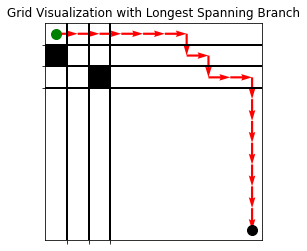

In [11]:
# Call the visualization function
plot_grid_with_arrows(grid, longest_branch)

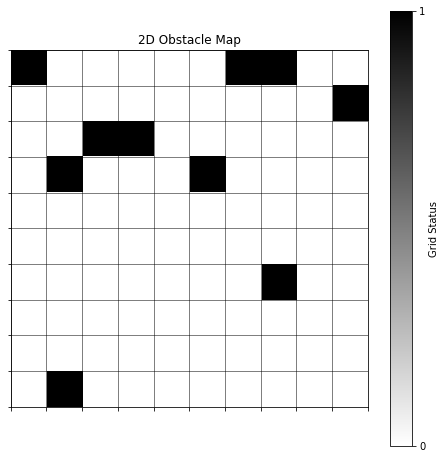

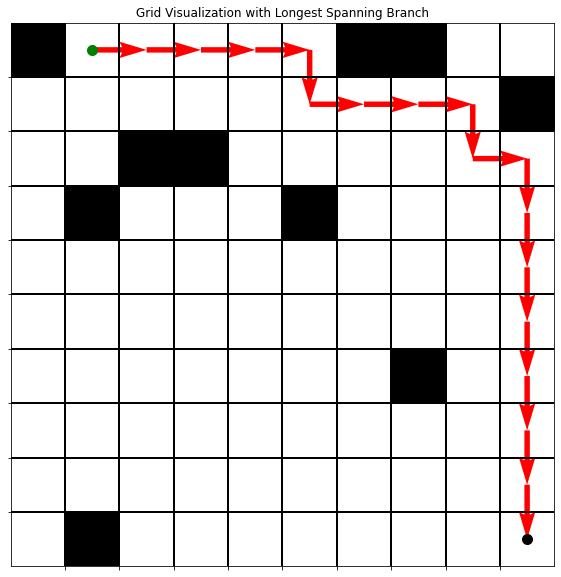

In [12]:
map_size = 10
obstacle_map = ObstacleMap(map_size)
obstacle_map.display_map()
current_map = obstacle_map.get_map()
tree, longest_branch = spanning_tree_coverage(current_map)
plot_grid_with_arrows(current_map, longest_branch)

# To Do:
-   Understand how trees work
-   How to create a tree data structure
-   understand how the spanning tree coverage algorithm works
-   implement the spanning tree coverage algorithm
-   Test the algorithm'
-   Test Genetic Algorithm for the same.
-   Test Ant colony optimisation algorithm on the same.

In [14]:
from collections import deque

def bfs_spanning_tree(grid):
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    tree = {}
    
    start_x, start_y = find_start(grid)
    queue = deque([(start_x, start_y, None)])
    
    while queue:
        x, y, parent = queue.popleft()
        if x < 0 or x >= rows or y < 0 or y >= cols or visited[x][y] or grid[x][y] == 1:
            continue
        
        visited[x][y] = True
        tree[(x, y)] = []
        if parent:
            tree[parent].append((x, y))
        
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            queue.append((nx, ny, (x, y)))
    
    return tree, (start_x, start_y)

def find_start(grid):
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 0:
                return i, j
    return 0, 0

def find_longest_branch(tree, start):
    def dfs(node):
        if not tree[node]:
            return [node]
        
        longest = []
        for child in tree[node]:
            path = dfs(child)
            if len(path) > len(longest):
                longest = path
        
        return [node] + longest

    return dfs(start)

# Main function to use the algorithm
def spanning_tree_coverage(grid):
    tree, start = bfs_spanning_tree(grid)
    longest_branch = find_longest_branch(tree, start)
    return tree, longest_branch

Spanning Tree: {(0, 0): [(0, 1)], (0, 1): [(0, 2), (1, 1)], (0, 2): [(0, 3), (1, 2)], (1, 1): [(2, 1)], (0, 3): [(1, 3)], (1, 2): [], (2, 1): [(3, 1), (2, 0)], (1, 3): [(2, 3)], (3, 1): [(3, 2), (3, 0)], (2, 0): [], (2, 3): [(3, 3)], (3, 2): [], (3, 0): [], (3, 3): []}
Longest Branch: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


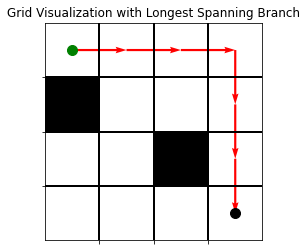

In [16]:
# Example usage
grid = [
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 0]
]

grid_1 = [
    [0, 0, 0, 0],
    [1, 0, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0]
]

tree, longest_branch = spanning_tree_coverage(grid)
print("Spanning Tree:", tree)
print("Longest Branch:", longest_branch)
plot_grid_with_arrows(grid, longest_branch)